# Wavelet analysis for rotation period extraction 

This notebook provide an example of analysis replacing the Lomb-Scargle periodogram by a wavelet analysis of the time series. The wavelet analysis is not a part of the PLATO MSAP4 rotation & activity baseline algorithms but it represents an interesting alternative in order to assess the performances of the framework. 

In [1]:
import numpy as np

In [2]:
import star_privateer as sp

In [3]:
sp.__version__

'1.2.0'

## A simple example

Our working case is KIC 3733735.

In [4]:
filename = sp.get_target_filename (sp.timeseries, '003733735')
t, s, dt = sp.load_resource (filename)

In order to save computing time, we rebin the data in 4-hour bins.

In [5]:
dt *= 4
t = np.mean (t.reshape (-1,4), axis=1)
s = np.mean (s.reshape (-1,4), axis=1)

We now run the analysis pipeline. In particular, we can take a look at the plots made from the different analysis methods. 

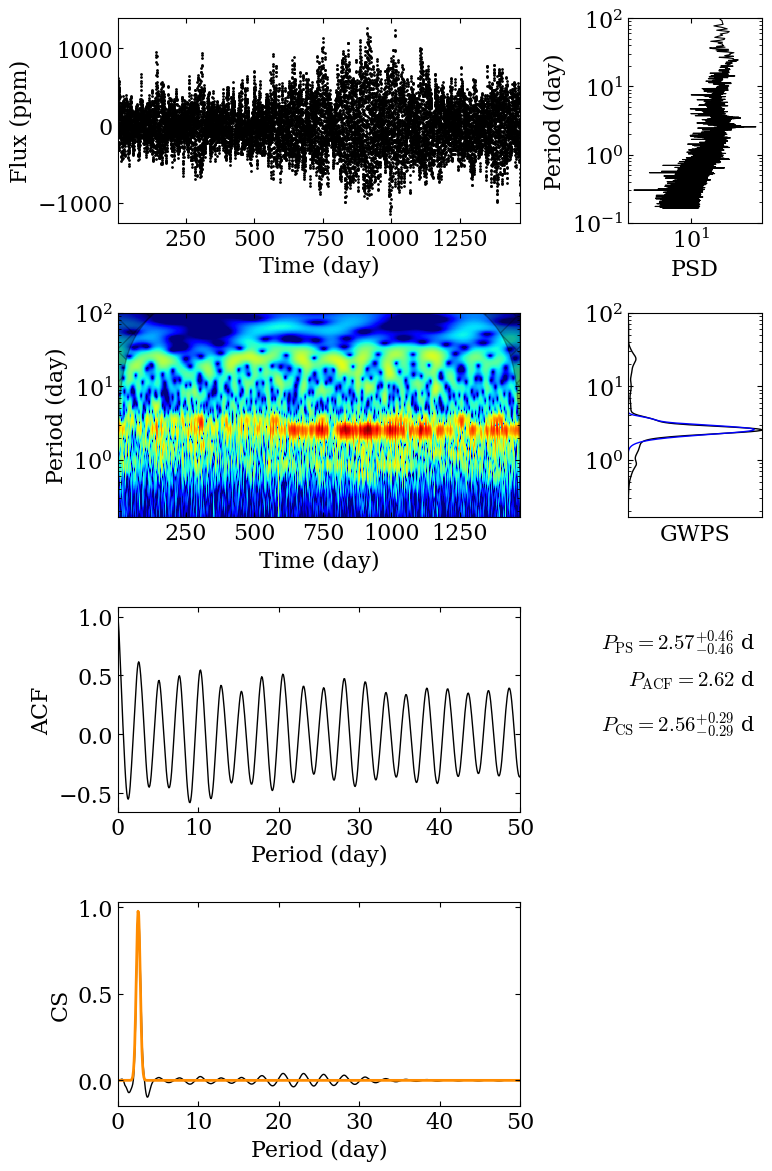

In [6]:
(p_wps, p_acf, gwps, wps, acf, 
 cs, coi, features, feature_names, _) = sp.analysis_pipeline (t, s, figsize=(8,12),
                                                             wavelet_analysis=True, plot=True,
                                                             xlim=(0,50), normscale='log', ylogscale=True,
                                                             add_periodogram=True)

It is also possible to compute the wavelet power spectrum and plot it independently from the other methods.

In [7]:
dt = (t[1]-t[0])*86400
(periods, wps, gwps, 
 coi, scales) = sp.compute_wps(s, dt, normalise=True, mother=None)

The GWPS peaks can be fitted with a set of Gaussian profile.

In [8]:
(prot_ps, E_prot_ps, 
 param_gauss) = sp.compute_prot_err_gaussian_fit (periods, gwps, n_profile=5, 
                                                       threshold=0.1)

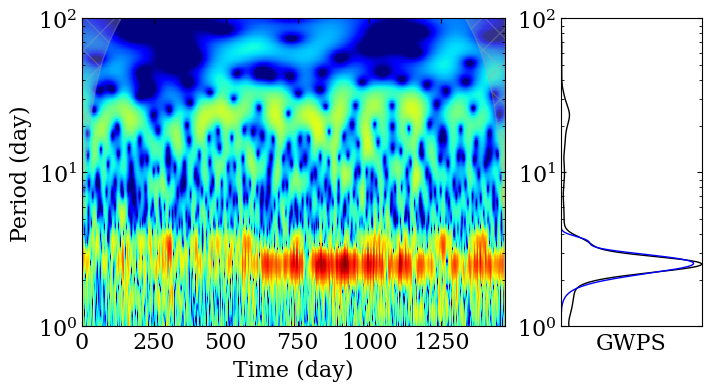

In [9]:
fig = sp.plot_wps(t-t[0], periods, wps, gwps, coi=coi, 
                     scales=scales, shading='auto', color_coi='darkgrey', 
                     ylogscale=True, lw=1, normscale='log', 
                     vmin=None, vmax=None, filename=None, dpi=300,
                     figsize=(8,4), ylim=(1, 100), show_contour=False,
                     param_gauss=param_gauss) 

Note that from `star_privateer=1.1.4`, it is possible to use `pywavelets` as backend instead of `pycwt`. In this case the cone of influence will not be computed as it is not implemented yet in the module. 

In [10]:
dt = (t[1]-t[0])*86400
(periods, wps, gwps, 
 _, scales) = sp.compute_wps(s, dt, normalise=True, mother=None,
                               backend="pywavelets")
(prot_ps, E_prot_ps, 
 param_gauss) = sp.compute_prot_err_gaussian_fit (periods, gwps, n_profile=5, 
                                                  threshold=0.1)

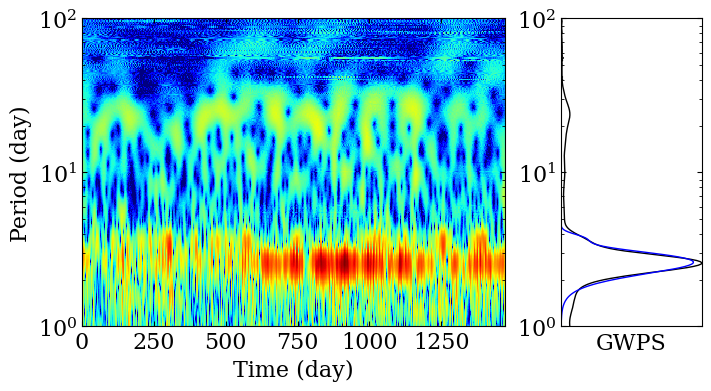

In [11]:
fig = sp.plot_wps(t-t[0], periods, wps, gwps, 
                  scales=scales, shading='auto', color_coi='darkgrey', 
                  ylogscale=True, lw=1, normscale='log', 
                  vmin=None, vmax=None, filename=None, dpi=300,
                  figsize=(8,4), ylim=(1, 100), show_contour=False,
                  param_gauss=param_gauss) 